In [75]:
import pandas as pd
import numpy as np

In [79]:
train = pd.read_csv('../data/train_1M.csv')
questions = pd.read_csv('../data/questions.csv')
train = train.query('content_type_id==0')
train = train.rename(columns={'content_id': 'question_id'})

In [102]:
train.head()

,Unnamed: 0,row_id,timestamp,user_id,question_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,question_avg_score,user_activity_cumcount,avgscore_cummean
919251,78225,78225,0,1710599,3597,0,0,0,0,NaN,NaN,3597,3,5,8,0.777778,0,NaN
200672,78226,78226,33675,1710599,448,0,1,0,1,35000.0,False,448,0,2,143 141 162 92 102,0.970874,1,0.000000
902858,78227,78227,60647,1710599,5355,0,2,2,0,29000.0,False,5355,0,5,55,0.406780,2,0.500000
430810,78228,78228,73424,1710599,6386,0,3,3,0,23000.0,False,6386,0,5,1,0.637500,3,0.333333
833664,78229,78229,93482,1710599,5035,0,4,0,0,10000.0,False,5035,1,5,8,0.482759,4,0.250000


In [80]:
questions['question_avg_score'] = train.groupby('question_id')['answered_correctly'].mean()
questions

,question_id,bundle_id,correct_answer,part,tags,question_avg_score
0,0,0,0,1,51 131 162 38,0.886076
1,1,1,1,1,131 36 81,0.842857
2,2,2,0,1,131 101 162 92,0.544355
3,3,3,0,1,131 149 162 29,0.741935
4,4,4,3,1,131 5 162 38,0.612378
5,5,5,2,1,131 149 162 81,0.865169
6,6,6,2,1,10 94 162 92,0.508079
7,7,7,0,1,61 110 162 29,0.841176
8,8,8,3,1,131 13 162 92,0.910112
9,9,9,3,1,10 164 81,0.306613


In [81]:
# Only keep questions, rename content_id and merge with questions table.
train = train.merge(questions, on='question_id').sort_values(by=['user_id', 'timestamp'])

In [104]:
train

,Unnamed: 0,row_id,timestamp,user_id,question_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,question_avg_score,user_activity_cumcount,avgscore_cummean
919251,78225,78225,0,1710599,3597,0,0,0,0,NaN,NaN,3597,3,5,8,0.777778,0,NaN
200672,78226,78226,33675,1710599,448,0,1,0,1,35000.0,False,448,0,2,143 141 162 92 102,0.970874,1,0.000000
902858,78227,78227,60647,1710599,5355,0,2,2,0,29000.0,False,5355,0,5,55,0.406780,2,0.500000
430810,78228,78228,73424,1710599,6386,0,3,3,0,23000.0,False,6386,0,5,1,0.637500,3,0.333333
833664,78229,78229,93482,1710599,5035,0,4,0,0,10000.0,False,5035,1,5,8,0.482759,4,0.250000
550822,78230,78230,106403,1710599,4728,0,5,0,1,17000.0,False,4728,0,5,125,0.482353,5,0.200000
362409,78231,78231,128887,1710599,6125,0,6,0,0,10000.0,False,6125,1,5,108,0.442244,6,0.333333
103207,78232,78232,242780,1710599,5583,0,7,2,1,19000.0,False,5583,2,5,54,0.743056,7,0.285714
387222,78233,78233,310833,1710599,6154,0,8,1,0,15000.0,True,6154,3,5,44,0.553114,8,0.375000
387844,78234,78234,343510,1710599,4406,0,9,0,0,26000.0,True,4406,3,5,33,0.633943,9,0.333333


In [83]:
# Add features . 
train['user_activity_cumcount']=train.groupby('user_id').cumcount()
#train['question_avg_score'] = train.groupby('question_id')['answered_correctly'].mean()
train['avgscore_cummean'] = train.groupby('user_id').answered_correctly.apply(lambda x: x.shift().expanding().mean())
# Then remove all columns but 'question_avg_score', 'user_avgscore_cummean', 'answered_correctly' (target). Replace inf by 0
b0_train = train[['question_avg_score', 'avgscore_cummean', 'answered_correctly']]
b0_train.avgscore_cummean.replace(np.nan, 0, inplace=True)



In [ ]:
#b0_train.to_csv('b0_model.csv')

In [105]:
train

,Unnamed: 0,row_id,timestamp,user_id,question_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,question_avg_score,user_activity_cumcount,avgscore_cummean
919251,78225,78225,0,1710599,3597,0,0,0,0,NaN,NaN,3597,3,5,8,0.777778,0,NaN
200672,78226,78226,33675,1710599,448,0,1,0,1,35000.0,False,448,0,2,143 141 162 92 102,0.970874,1,0.000000
902858,78227,78227,60647,1710599,5355,0,2,2,0,29000.0,False,5355,0,5,55,0.406780,2,0.500000
430810,78228,78228,73424,1710599,6386,0,3,3,0,23000.0,False,6386,0,5,1,0.637500,3,0.333333
833664,78229,78229,93482,1710599,5035,0,4,0,0,10000.0,False,5035,1,5,8,0.482759,4,0.250000
550822,78230,78230,106403,1710599,4728,0,5,0,1,17000.0,False,4728,0,5,125,0.482353,5,0.200000
362409,78231,78231,128887,1710599,6125,0,6,0,0,10000.0,False,6125,1,5,108,0.442244,6,0.333333
103207,78232,78232,242780,1710599,5583,0,7,2,1,19000.0,False,5583,2,5,54,0.743056,7,0.285714
387222,78233,78233,310833,1710599,6154,0,8,1,0,15000.0,True,6154,3,5,44,0.553114,8,0.375000
387844,78234,78234,343510,1710599,4406,0,9,0,0,26000.0,True,4406,3,5,33,0.633943,9,0.333333


In [93]:
b0_train.tail(100)

,question_avg_score,avgscore_cummean,answered_correctly
704678,0.648649,0.484461,0
697170,0.281553,0.483577,0
135624,0.642857,0.482696,1
62341,0.479005,0.483636,1
617917,0.448980,0.484574,0
653185,0.370787,0.483696,1
379473,0.528302,0.484629,0
296391,0.680751,0.483755,1
704715,0.761905,0.484685,1
219116,0.707865,0.485612,0


In [91]:
#import matplotlib.pyplot as plt
#plt.scatter(b0_train.question_avg_score, c=y)
b0_train.question_avg_score

919251    0.777778
200672    0.970874
902858    0.406780
430810    0.637500
833664    0.482759
550822    0.482353
362409    0.442244
103207    0.743056
387222    0.553114
387844    0.633943
282963    0.576923
132151    0.553547
102508    0.753086
701313    0.880952
607693    0.866667
449112    0.531250
140986    0.724000
170084    0.751323
149690    0.754545
207024    0.842105
58364     0.773614
208142    0.719697
956260    0.548387
554299    0.629482
282220    0.526316
156364    0.670185
154213    0.938462
213662    0.570332
392979    0.534884
600023    0.583333
            ...   
224256    0.729412
194372    0.543568
380568    0.740741
586372    0.755556
147028    0.688172
32766     0.539853
441659    0.609272
138471    0.661290
120734    0.773034
927504    0.661538
335817    0.552743
55376     0.342246
338553    0.695364
155329    0.846947
728242    0.619632
839392    0.836957
552715    0.710280
152824    0.559020
151759    0.637765
602477    0.670782
126580    0.719298
884191    0.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn. metrics import roc_auc_score, accuracy_score


log = LogisticRegression(solver='saga', max_iter=1000)

X = b0_train.drop(columns=['question_avg_score', 'avgscore_cummean'])
y = b0_train.answered_correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

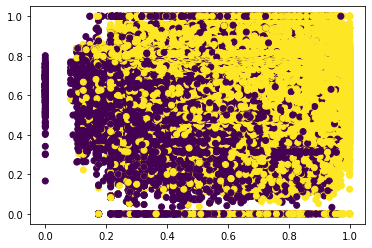

In [101]:
plt.scatter(b0_train.question_avg_score, b0_train.avgscore_cummean, c=y)

In [87]:
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

#cv_results = cross_validate(log, X, y, scoring='accuracy')

#print(cv_results['test_score'].mean())


#y_pred = cross_val_predict(log, X, y, cv=10)
accuracy = accuracy_score(y_test, y_pred)


In [88]:
accuracy

1.0

In [89]:
b0_train.answered_correctly.value_counts()

1    635571
0    332263
Name: answered_correctly, dtype: int64

In [16]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']